# One sample t-test

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [2]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns

## Example

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/rowingTeam.png" width=50% >

Here are the heights in cm of eight men on a rowing team

In [3]:
heights = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/rowersHeights.csv')
display(heights)

,height
0,180.7
1,185.1
2,198.1
3,175.3
4,181.3
5,179.4
6,166.5
7,176.9


An observer notes that the men seem quite tall, and hypothesises that rowers are generally tall as tall people can row faster.

Use a one-sample t-test to determine whether the mean height of the rowing team is 
significantly greater than the average height of men in the UK (175 cm).

### Plot the data

First we plot the data to check if they are roughly normally distributed and check for outliers. 
As before, a KDE plot is useful to show the shape of the distribution, and a rug plot to show individual values, 
as the sample size is so small 
                                                                                                                       

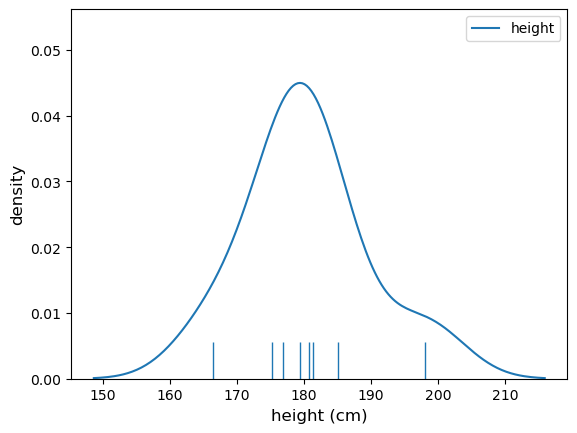

In [7]:
plot = sns.kdeplot(data = heights)
sns.rugplot(data = heights, height=0.1)
plt.xlabel("height (cm)", fontsize = 12)
plt.ylabel("density", fontsize = 12)
plt.show()

As usual, it's difficult to say if the data are normally distributed from a plot of a small sample - 
they don't look too bad although there is one very tall outlier.

However, height is generally normally distributed so let's go ahead and use the t-test.

### Hypotheses


Ho: the mean height of rowers is greater than the population average of 175cm

Ha: the mean higher of rowers is not different from the populaation average of 175cm
    
This is a one tailed test as the observer's hypothesis (described above) is directional - 
she thinks taller people are more likely to be good rowers

We will test at the $\alpha = 0.05$ significance level

### Descriptive Statistics

First, we obtain the relevant desriptive statistics. By relevant, I mean the ones that go into the equation for the t-test:

$$ t = \frac{\bar{x}}{\frac{s}{\sqrt{n}}} $$

This would be the sample mean $\bar{x}$, the standard deviation $s$, and the sample size $n$.



In [12]:
heights.describe()

,height
count,8.000000
mean,180.412500
std,9.013868
min,166.500000
25%,176.500000
50%,180.050000
75%,182.250000
max,198.100000


It looks like the mean height of rowers (180.4cm) is above the population mean of 175cm.

Is this a big difference? It is less than one standard deviation above the mean: s=8.4 and (180.4-175)=5.4. 
It turns out (from the normal distribution) that if the average rower was an actual person, they would be taller than about 75% of others, so tall but not remarkably so. 

However, another key element is the variability in the dataset - if the rowers are consistently quite tall (that is most of them are tall), they may as a group be significantly taller than average.

### Carry out the test

To do the t-test itself we use a one-sample t-test using the function <tt>ttest_1samp</tt> (that's <tt>1samp</tt> for one sample) from 
<tt>scipy.stats</tt>, here loaded as <tt>stats</tt>

In [103]:
stats.ttest_1samp(heights, 175, alternative='greater')

Ttest_1sampResult(statistic=1.6983675966357161, pvalue=0.06662234508287802)

The inputs to stats.ttest_1samp are the sample (from our Pandas data frame <tt>heights</tt>) and the value to which they are to be compared (the average height of british men, 175cm),
and the argument <tt>alternative='greater'</tt>, which tells the computer to run a one tailed test 
that mean of the first input <tt>heights</tt> is greater than the reference value <tt>175</tt>.

The outputs are <tt>statistic</tt> ($t=1.70$) and <tt>pvalue</tt> ($p=0.067$) - if this is less than our $\alpha$ value 0.5, there is a significant difference.

### Degrees of freedom

In a scientific write-up we also need to report the degrees of freedom of the test. This tells us how many observations (data-points) the test was based on, corrected for the number of means we had to estimate from the data in order to do the test.

In the case of the one sample t-test $df = n-1$ so in this case, df=7 and we can report out test results as:

$t(7) = 1.70, p=0.067$ (one-tailed)

### Interpretation

Our t value of 1.67 means that the difference between the mean height of the rowers and the standard value (175cm, the mean height of British men) is 1.67 times the standard error (where $ SE = \frac{s}{\sqrt{n}}$).

Such a large difference (in the expected direction) would occur 0.067 (6.7%) of the time due to chance if the null hypothesis were true (rowers were no taller than other men), hence the p value of 0.067. This is higher than our alpha value (0.05) so the test is not significant.

This diagram shows the expected distribution of t-values if the null were true, with our obtained t-value marked:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/ttestRowing.png" width=50% alt="There should be a picture of the t-distribution here" >

### Draw conclusions

As p>0.05 the test is not significant and we fail to reject the null hypothesis. There is not sufficient evidence to support the hypothesis that rowers are taller than average.

## Write-up 
<br>

<div style = "    padding-top: 10px;
    padding-bottom: 10px;
    padding-left: 10px;
    padding-right: 10px;
    box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
    vertical-align: middle;">
    
Above, I walked you through how to run the t-test and why we make different choices. 
    
In this section we practice writing up our analysis in the correct style for a scientific report. 
    
Replace the XXXs with the correct values!    

</div>

<br>

To test the hypothesis that rowers are taller than average, we measaured the heights of 8 male rowers and compared to the natinoal value for mean height of British men (obtained from Wikipedia): 175cm.

The data are shown below:

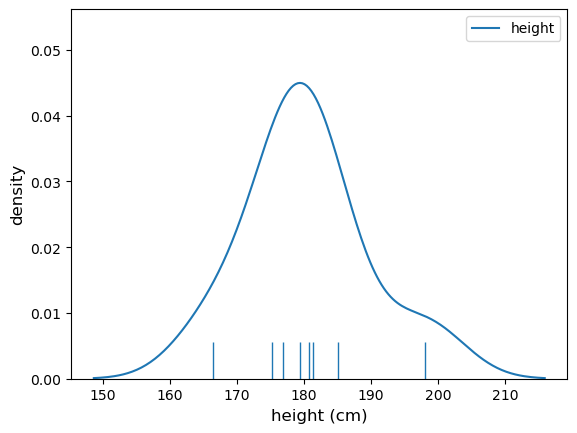

In [8]:
plot = sns.kdeplot(data = heights)
sns.rugplot(data = heights, height=0.1)
plt.xlabel("height (cm)", fontsize = 12)
plt.ylabel("density", fontsize = 12)
plt.show()

The mean height of the rowers was XXX.X cm and the standard deviation was X.XX cm.

In [14]:
heights = pandas.read_csv('data/rowersHeights.csv')
heights.describe()

,height
count,8.000000
mean,180.412500
std,9.013868
min,166.500000
25%,176.500000
50%,180.050000
75%,182.250000
max,198.100000


We used a one-sample t-test (alpha = X, XX tailed). The use of the t-test (assumption of normality) was justified theoretically on the grounds that heights are typically normally distributed.

In [15]:
stats.ttest_1samp(heights, 175, alternative='greater')

Ttest_1sampResult(statistic=array([1.6983676]), pvalue=array([0.06662235]))

The results of the t-test $t(XX) =$ X.XX, $p=$X.XX (XX-tailed) suggest that there is insufficient evidence ot reject the null and we cannot conclude that rowers are taller than average.